In [29]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
import pickle

In [2]:
#Inspección del conjunto de datos de entrada
music = pd.read_csv('/home/features_30_sec.csv')
music = music.drop(columns=['harmony_mean','harmony_var','perceptr_mean','perceptr_var'])
print(len(list(music.columns))-3)

53


In [3]:
music_label = music.values[:,-1]
music_features = music.values[:,2:-1]
music_index = music.values[:,0:1]

#Se pegan la etiqueta y el nombre de la canción
music_label = np.concatenate((music_label.reshape(1000,1),music_index.reshape(1000,1)), axis=1)
print(music_label[0:4,:])

[['blues' 'blues.00000.wav']
 ['blues' 'blues.00001.wav']
 ['blues' 'blues.00002.wav']
 ['blues' 'blues.00003.wav']]


In [4]:

X_train, X_val_test, y_train, y_val_test = train_test_split(music_features, music_label, test_size=0.20, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_val_test, y_val_test, test_size=0.50, random_state=42)


In [5]:
#Se sintoniza el algoritmo de random forest
music_forest = RandomForestClassifier(max_depth=10, random_state=0, oob_score =True)
music_forest.fit(X_train, y_train[:,0])
music_forest.oob_score_

0.69125

In [6]:
out_val = music_forest.predict(X_val)
print(out_val[:5])

['hiphop' 'metal' 'pop' 'reggae' 'metal']


In [7]:
unique, counts = np.unique(out_val, return_counts=True)
dict(zip(unique, counts))

{'blues': 9,
 'classical': 7,
 'country': 5,
 'disco': 8,
 'hiphop': 11,
 'jazz': 15,
 'metal': 17,
 'pop': 4,
 'reggae': 11,
 'rock': 13}

In [8]:
unique, counts = np.unique(y_val[:,0], return_counts=True)
dict(zip(unique, counts))

{'blues': 7,
 'classical': 7,
 'country': 11,
 'disco': 8,
 'hiphop': 9,
 'jazz': 16,
 'metal': 13,
 'pop': 5,
 'reggae': 12,
 'rock': 12}

In [9]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report

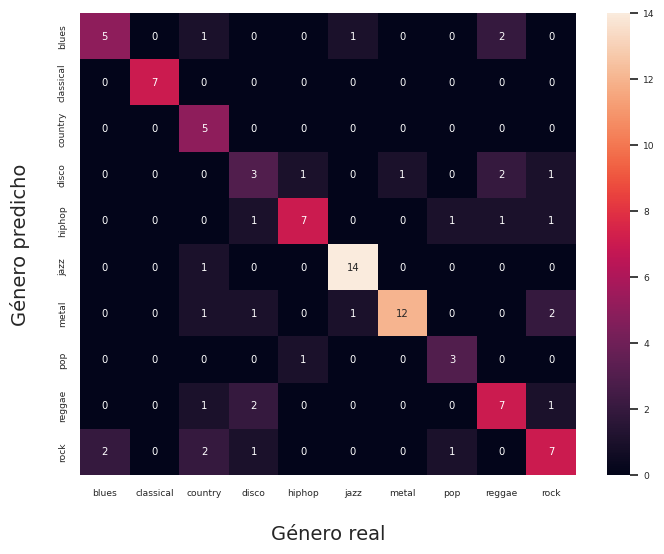

In [10]:
plt.figure(figsize=(8,6), dpi=100)
cf_matrix = confusion_matrix(out_val, y_val[:,0])

sns.set(font_scale = 0.6)
ax = sns.heatmap(cf_matrix, annot=True)

ax.set_xlabel("Género real", fontsize=14, labelpad=20)
ax.xaxis.set_ticklabels(unique)

ax.set_ylabel("Género predicho", fontsize=14, labelpad=20)
ax.yaxis.set_ticklabels(unique)
plt.show()

In [11]:
print(classification_report(y_val[:,0], out_val))

              precision    recall  f1-score   support

       blues       0.56      0.71      0.63         7
   classical       1.00      1.00      1.00         7
     country       1.00      0.45      0.62        11
       disco       0.38      0.38      0.38         8
      hiphop       0.64      0.78      0.70         9
        jazz       0.93      0.88      0.90        16
       metal       0.71      0.92      0.80        13
         pop       0.75      0.60      0.67         5
      reggae       0.64      0.58      0.61        12
        rock       0.54      0.58      0.56        12

    accuracy                           0.70       100
   macro avg       0.71      0.69      0.69       100
weighted avg       0.73      0.70      0.70       100



In [12]:
from sklearn.model_selection import ParameterGrid

In [13]:
#Evaluación de más configuraciones de random forests

# Grid de hiperparámetros evaluados
# ==============================================================================
param_grid = ParameterGrid(
                {'n_estimators': [150],
                 'max_features': [5, 7, 9, 11],
                 'max_depth'   : [None, 3, 10, 20],
                 'criterion'   : ['gini', 'entropy']
                }
            )
# Loop para ajustar un modelo con cada combinación de hiperparámetros
# ==============================================================================
resultados = {'params': [], 'oob_accuracy': []}

for params in param_grid:

    modelo = RandomForestClassifier(
                oob_score    = True,
                n_jobs       = -1,
                random_state = 0,
                ** params
             )

    modelo.fit(X_train, y_train[:,0])

    resultados['params'].append(params)
    resultados['oob_accuracy'].append(modelo.oob_score_)
    print(f"Modelo: {params} \u2713")

resultados = pd.DataFrame(resultados)
resultados = pd.concat([resultados, resultados['params'].apply(pd.Series)], axis=1)
resultados = resultados.sort_values('oob_accuracy', ascending=False)
resultados = resultados.drop(columns = 'params')
resultados.head(4)

Modelo: {'criterion': 'gini', 'max_depth': None, 'max_features': 5, 'n_estimators': 150} ✓
Modelo: {'criterion': 'gini', 'max_depth': None, 'max_features': 7, 'n_estimators': 150} ✓
Modelo: {'criterion': 'gini', 'max_depth': None, 'max_features': 9, 'n_estimators': 150} ✓
Modelo: {'criterion': 'gini', 'max_depth': None, 'max_features': 11, 'n_estimators': 150} ✓
Modelo: {'criterion': 'gini', 'max_depth': 3, 'max_features': 5, 'n_estimators': 150} ✓
Modelo: {'criterion': 'gini', 'max_depth': 3, 'max_features': 7, 'n_estimators': 150} ✓
Modelo: {'criterion': 'gini', 'max_depth': 3, 'max_features': 9, 'n_estimators': 150} ✓
Modelo: {'criterion': 'gini', 'max_depth': 3, 'max_features': 11, 'n_estimators': 150} ✓
Modelo: {'criterion': 'gini', 'max_depth': 10, 'max_features': 5, 'n_estimators': 150} ✓
Modelo: {'criterion': 'gini', 'max_depth': 10, 'max_features': 7, 'n_estimators': 150} ✓
Modelo: {'criterion': 'gini', 'max_depth': 10, 'max_features': 9, 'n_estimators': 150} ✓
Modelo: {'crite

,oob_accuracy,criterion,max_depth,max_features,n_estimators
2,0.70375,gini,NaN,9,150
14,0.70250,gini,20.0,9,150
17,0.69625,entropy,NaN,7,150
29,0.69625,entropy,20.0,7,150


In [14]:
resultados.tail(10)

,oob_accuracy,criterion,max_depth,max_features,n_estimators
0,0.67250,gini,NaN,5,150
12,0.67000,gini,20.0,5,150
5,0.51500,gini,3.0,7,150
7,0.51000,gini,3.0,11,150
6,0.50750,gini,3.0,9,150
21,0.49875,entropy,3.0,7,150
22,0.49250,entropy,3.0,9,150
23,0.48875,entropy,3.0,11,150
4,0.48375,gini,3.0,5,150
20,0.46250,entropy,3.0,5,150


# Comprobación de los mejores modelos encontrados por la sintonización

In [15]:
#Se sintoniza el algoritmo de random forest
music_forest_1 = RandomForestClassifier(max_depth=None, random_state=0, oob_score =True, n_estimators=150, max_features=9, criterion='gini',n_jobs=-1)
music_forest_1.fit(X_train, y_train[:,0])
music_forest_1.oob_score_

0.70375

In [16]:
out_val_1 = music_forest_1.predict(X_val)
print(out_val_1[:5])

['hiphop' 'metal' 'pop' 'reggae' 'rock']


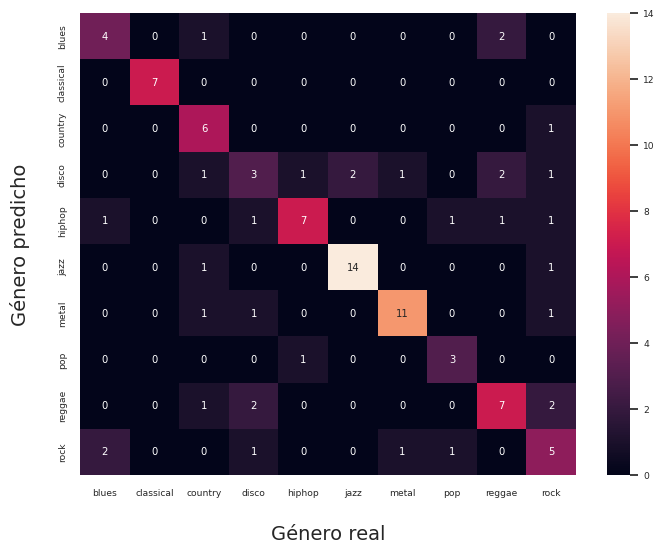

In [17]:
plt.figure(figsize=(8,6), dpi=100)
cf_matrix = confusion_matrix(out_val_1, y_val[:,0])

sns.set(font_scale = 0.6)
ax = sns.heatmap(cf_matrix, annot=True)

ax.set_xlabel("Género real", fontsize=14, labelpad=20)
ax.xaxis.set_ticklabels(unique)

ax.set_ylabel("Género predicho", fontsize=14, labelpad=20)
ax.yaxis.set_ticklabels(unique)
plt.show()

In [18]:
print(classification_report(y_val[:,0], out_val_1))

              precision    recall  f1-score   support

       blues       0.57      0.57      0.57         7
   classical       1.00      1.00      1.00         7
     country       0.86      0.55      0.67        11
       disco       0.27      0.38      0.32         8
      hiphop       0.58      0.78      0.67         9
        jazz       0.88      0.88      0.88        16
       metal       0.79      0.85      0.81        13
         pop       0.75      0.60      0.67         5
      reggae       0.58      0.58      0.58        12
        rock       0.50      0.42      0.45        12

    accuracy                           0.67       100
   macro avg       0.68      0.66      0.66       100
weighted avg       0.69      0.67      0.67       100



In [20]:
#Se sintoniza el algoritmo de random forest
music_forest_2 = RandomForestClassifier(max_depth=20, random_state=0, oob_score =True, n_estimators=150, max_features=9, criterion='gini',n_jobs=-1)
music_forest_2.fit(X_train, y_train[:,0])
music_forest_2.oob_score_

0.7025

In [21]:
out_val_2 = music_forest_2.predict(X_val)
print(out_val[:5])

['hiphop' 'metal' 'pop' 'reggae' 'metal']


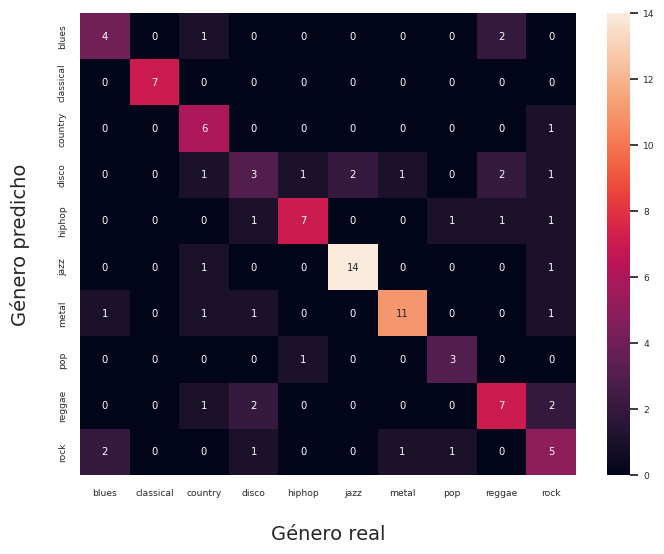

In [22]:
plt.figure(figsize=(8,6), dpi=100)
cf_matrix = confusion_matrix(out_val_2, y_val[:,0])

sns.set(font_scale = 0.6)
ax = sns.heatmap(cf_matrix, annot=True)

ax.set_xlabel("Género real", fontsize=14, labelpad=20)
ax.xaxis.set_ticklabels(unique)

ax.set_ylabel("Género predicho", fontsize=14, labelpad=20)
ax.yaxis.set_ticklabels(unique)
plt.show()

In [23]:
print(classification_report(y_val[:,0], out_val_2))

              precision    recall  f1-score   support

       blues       0.57      0.57      0.57         7
   classical       1.00      1.00      1.00         7
     country       0.86      0.55      0.67        11
       disco       0.27      0.38      0.32         8
      hiphop       0.64      0.78      0.70         9
        jazz       0.88      0.88      0.88        16
       metal       0.73      0.85      0.79        13
         pop       0.75      0.60      0.67         5
      reggae       0.58      0.58      0.58        12
        rock       0.50      0.42      0.45        12

    accuracy                           0.67       100
   macro avg       0.68      0.66      0.66       100
weighted avg       0.69      0.67      0.67       100



In [24]:
#Se sintoniza el algoritmo de random forest
music_forest_3 = RandomForestClassifier(max_depth=None, random_state=0, oob_score =True, n_estimators=150, max_features=7, criterion='entropy',n_jobs=-1)
music_forest_3.fit(X_train, y_train[:,0])
music_forest_3.oob_score_

0.69625

In [25]:
out_val_3 = music_forest_3.predict(X_val)
print(out_val[:5])

['hiphop' 'metal' 'pop' 'reggae' 'metal']


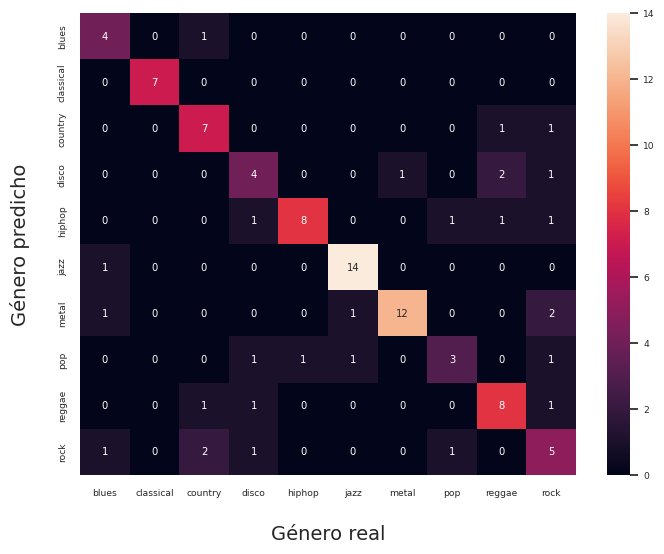

In [26]:
plt.figure(figsize=(8,6), dpi=100)
cf_matrix = confusion_matrix(out_val_3, y_val[:,0])

sns.set(font_scale = 0.6)
ax = sns.heatmap(cf_matrix, annot=True)

ax.set_xlabel("Género real", fontsize=14, labelpad=20)
ax.xaxis.set_ticklabels(unique)

ax.set_ylabel("Género predicho", fontsize=14, labelpad=20)
ax.yaxis.set_ticklabels(unique)
plt.show()

In [27]:
print(classification_report(y_val[:,0], out_val_3))

              precision    recall  f1-score   support

       blues       0.80      0.57      0.67         7
   classical       1.00      1.00      1.00         7
     country       0.78      0.64      0.70        11
       disco       0.50      0.50      0.50         8
      hiphop       0.67      0.89      0.76         9
        jazz       0.93      0.88      0.90        16
       metal       0.75      0.92      0.83        13
         pop       0.43      0.60      0.50         5
      reggae       0.73      0.67      0.70        12
        rock       0.50      0.42      0.45        12

    accuracy                           0.72       100
   macro avg       0.71      0.71      0.70       100
weighted avg       0.73      0.72      0.72       100



In [12]:
#Se sintoniza el algoritmo de random forest
music_forest_4 = RandomForestClassifier(max_depth=20, random_state=0, oob_score =True, n_estimators=150, max_features=7, criterion='entropy',n_jobs=-1)
music_forest_4.fit(X_train, y_train[:,0])
music_forest_4.oob_score_

0.69625

In [13]:
out_val_4 = music_forest_4.predict(X_val)
print(out_val_4[:5])

['hiphop' 'metal' 'pop' 'reggae' 'rock']


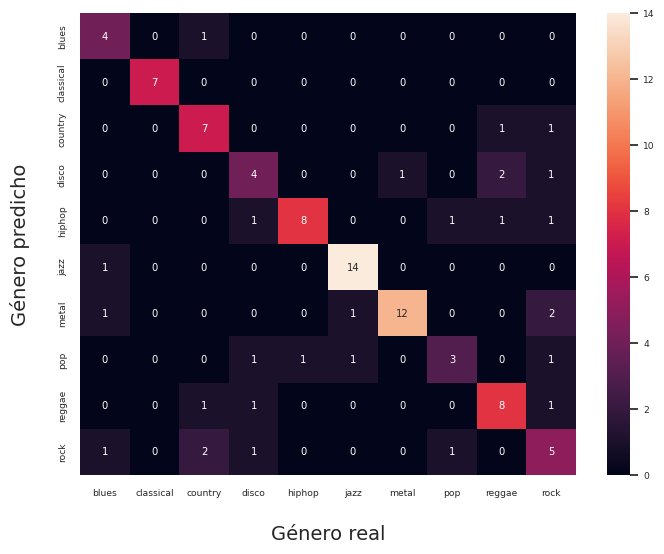

In [14]:
plt.figure(figsize=(8,6), dpi=100)
cf_matrix = confusion_matrix(out_val_4, y_val[:,0])

sns.set(font_scale = 0.6)
ax = sns.heatmap(cf_matrix, annot=True)

ax.set_xlabel("Género real", fontsize=14, labelpad=20)
ax.xaxis.set_ticklabels(unique)

ax.set_ylabel("Género predicho", fontsize=14, labelpad=20)
ax.yaxis.set_ticklabels(unique)
plt.show()

In [15]:
print(classification_report(y_val[:,0], out_val_4))

              precision    recall  f1-score   support

       blues       0.80      0.57      0.67         7
   classical       1.00      1.00      1.00         7
     country       0.78      0.64      0.70        11
       disco       0.50      0.50      0.50         8
      hiphop       0.67      0.89      0.76         9
        jazz       0.93      0.88      0.90        16
       metal       0.75      0.92      0.83        13
         pop       0.43      0.60      0.50         5
      reggae       0.73      0.67      0.70        12
        rock       0.50      0.42      0.45        12

    accuracy                           0.72       100
   macro avg       0.71      0.71      0.70       100
weighted avg       0.73      0.72      0.72       100



# Prueba con un dato de la vida real

---



In [16]:
import librosa
import librosa.feature as Aud

In [25]:
audio_path = '/Audio/metal.00017.wav'
x , sr = librosa.load(audio_path, sr=None)
record = {}
print(x.shape, sr, np.mean(x))

(661504,) 22050 -0.0062890104


In [26]:
chroma = Aud.chroma_stft(y=x, sr=sr)
rms = Aud.rms(y=x)
cent = Aud.spectral_centroid(y=x, sr=sr)
spec_bw = Aud.spectral_bandwidth(y=x, sr=sr)
rolloff = Aud.spectral_rolloff(y=x, sr=sr)
zero_cross = Aud.zero_crossing_rate(x)
onset_env = librosa.onset.onset_strength(y=x, sr=sr)
tempo = Aud.tempo(onset_envelope=onset_env, sr=sr)

record['chroma_stft_mean'] = np.mean(chroma)
record['chroma_stft_var'] = np.var(chroma)
record['rms_mean'] = np.mean(rms)
record['rms_var'] = np.var(rms)
record['spectral_centroid_mean'] = np.mean(cent)
record['spectral_centroid_var'] = np.var(cent)
record['spectral_bandwidth_mean'] = np.mean(spec_bw)
record['spectral_bandwidth_var'] = np.var(spec_bw)
record['rolloff_mean'] = np.mean(rolloff)
record['rolloff_var'] = np.var(rolloff)
record['zero_crossing_rate_mean'] = np.mean(zero_cross)
record['zero_crossing_rate_var'] = np.var(zero_cross)
record['tempo'] = tempo

In [27]:
mfccs = Aud.mfcc(y = x, sr = sr)
for i in range(mfccs.shape[0]):
  key_m = 'mfcc' + str(i+1) + '_mean'
  key_v = 'mfcc' + str(i+1) + '_var'
  record[key_m] = np.mean(mfccs[i,:])
  record[key_v] = np.var(mfccs[i,:])

df = pd.DataFrame(record)
df = df.values
print(df.shape)

(1, 53)


In [28]:
Mago = music_forest_4.predict(df)
print(Mago)

['metal']


# Se exporta el modelo a un archivo

In [30]:
filename = '/finalized_model_RandomF.sav'
pickle.dump(music_forest_4, open(filename, 'wb'))

In [31]:
# load the model from disk
loaded_model = pickle.load(open('/finalized_model_RandomF.sav', 'rb'))
result = loaded_model.predict(df)
print(result)

['metal']
